# EE-205  Circuits & Systems II
## Template for Homework 3, Problem 2: Convolution

In this exercise, we will use python to compute the convolution of two continues-time signals.

>The python packet *NumPy* provides a function *convolve* to compute the convolution of discrete-time signals.

__Question:__ 

- How will you handle the difference between continuous convolution and discrete convolution?

Once you are done with the exercises, feel free to play around with this code and try to convolve you own functions!

### Set up the parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
time_step = 0.01                            # time step to model continous time
time_axis = np.arange(-2., 4., time_step)   # original time axis
convolved_time_axis = np.arange(-4., 8, time_step)[:-1] # convolved time axis
N = time_axis.size                          # length of time axis
M = convolved_time_axis.size                # length of convolved time axis

If you do the convolution correctly, the output sequece will be longer than the orignal time axis! Think about why this is.

The length of your output sequence should be M potins.

Note that you don't have to use *time_axis, convolved_time_axis, N* and *M* yourself. They are only for the plots at the very end.

### Define the Functions.  

*Optional: if you are interested, once you're done with the exercises, you can change the step function to a rectangle/pulse*

You don't need to modify anyting here for the homework, but feel free to play around with other functions when you're done.

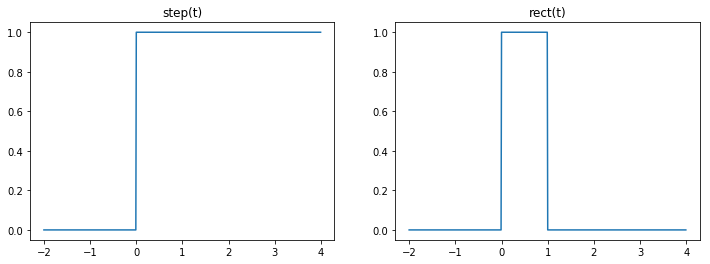

In [2]:
def step(t):       #defining the step function
    return t>=0

def rect(t):       #defining the rect function
    return np.abs(np.floor(t)) < 1


#ploting code
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(time_axis, step(time_axis))
plt.title('step(t)')

plt.subplot(122)
plt.plot(time_axis, rect(time_axis))
plt.title('rect(t)')

plt.show()

Here are the two other functions (impulse responses) that you will need for this problem.

The first one for Problem 2b, $h_b(t)$ is already implemented. 

It is **your task** to implement the second one: $ h_c(t) = e^{-2t}step(t)$

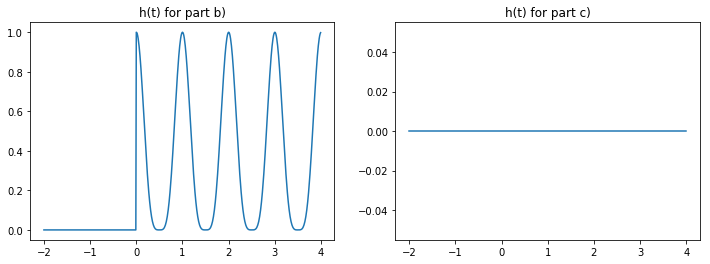

In [3]:
def hb(t):
    return (np.cos(np.pi*t)**4)*step(t)

def hc(t):
    ## Your code goes here
    return 0*t

## Ploting code
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(time_axis, hb(time_axis))
plt.title('h(t) for part b)')

plt.subplot(122)
plt.plot(time_axis, hc(time_axis))
plt.title('h(t) for part c)')

plt.show()

### Time to convolve !
It is **your task** to write the code computing the convolution. 

You can either implement it yourself or use existing functions in libraries. 

You have to define:
- $y_b(t) = step(t) * cos^4(\pi t)step(t)$
- $y_c(t) = rect(t) * e^{-2t}step(t)$

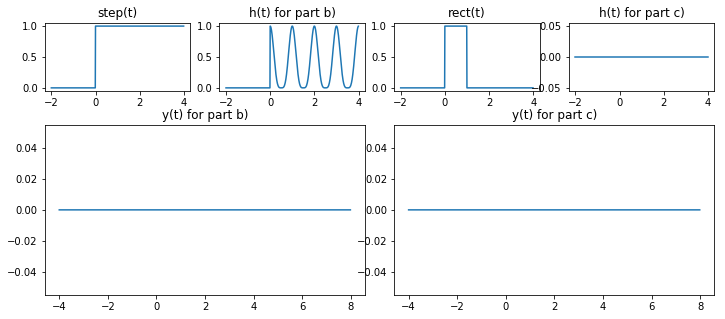

In [4]:
def yb(t):
    ##your code goes here
    return np.zeros(M)

def yc(t):
    ## Your code goes here
    return np.zeros(M)

## Ploting code, you don't need to modify anything here
plt.figure(figsize=(12,5))
grid = plt.GridSpec(3, 4, hspace=0.5)

plt.subplot(grid[0,0])
plt.plot(time_axis, step(time_axis))
plt.title('step(t)')
plt.subplot(grid[0,2])
plt.plot(time_axis, rect(time_axis))
plt.title('rect(t)')

plt.subplot(grid[0,1])
plt.plot(time_axis, hb(time_axis))
plt.title('h(t) for part b)')

plt.subplot(grid[0,3])
plt.plot(time_axis, hc(time_axis))
plt.title('h(t) for part c)')

leftone = plt.subplot(grid[1:,:2])
plt.plot(convolved_time_axis, yb(time_axis))
plt.title('y(t) for part b)')


plt.subplot(grid[1:,2:], sharey = leftone)
plt.plot(convolved_time_axis, yc(time_axis))
plt.title('y(t) for part c)')

plt.show()

    

Check the amplitude of your curve. Does it make sense?
If not, recall that we are using discrete summation to approximate continuous integral!  
__Hint:__ Recall from your Analysis class that the integral can be approximated by the discrete **[Riemann-sum](https://en.wikipedia.org/wiki/Riemann_sum)**.

$$
y(t) = \int_{-\infty}^{\infty}h(\tau)x(t-\tau)d\tau \approx T\sum_{k}h(k)x(t-k).
$$
where ***T*** is the discretization step
